In [1]:
#Data from https://www.datacommons.org/
with open("fact_checks_20180502.txt", "r") as f:
    data=f.read().split("\n")
   

data[0]

'<script type="application/ld+json">{"@context":"http://schema.org","@type":"ClaimReview","datePublished":"2014-04-07","url":"https://www.snopes.com/fact-check/dwayne-johnson-death-hoax/","sdLicense":"https://creativecommons.org/licenses/by-nc/4.0/","author":{"@type":"Organization","name":"Snopes.com"},"claimReviewed":"Actor Dwayne Johnson died filming a stunt for <I>Fast & Furious</I> 7.","reviewRating":{"@type":"Rating","alternateName":"False"}}</script>'

In [2]:
import pandas as pd
import numpy as py
#from pandas.io.json import json_normalize
import json
import re

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [3]:
claims=[]
for claim in data:
    try:
        t=claim.replace('<script type="application/ld+json">',"").replace("</script>","")
        if len(t)>0:
            jdata=json.loads(t)
            claims.append(jdata)
    except:
        print("\"{0}\"".format(claim))
    

print(claims[0])


{'author': {'name': 'Snopes.com', '@type': 'Organization'}, 'reviewRating': {'alternateName': 'False', '@type': 'Rating'}, '@type': 'ClaimReview', 'url': 'https://www.snopes.com/fact-check/dwayne-johnson-death-hoax/', 'sdLicense': 'https://creativecommons.org/licenses/by-nc/4.0/', '@context': 'http://schema.org', 'datePublished': '2014-04-07', 'claimReviewed': 'Actor Dwayne Johnson died filming a stunt for <I>Fast & Furious</I> 7.'}


In [4]:
#df=pd.read_json(json.dumps(claims))
df=pd.io.json.json_normalize(claims)
df.columns=[c.replace("@","") for c in df.columns] #Get rid of @ in column names
df.to_csv("claims.csv")
df

,context,type,author.type,author.name,author.url,claimReviewed,datePublished,itemReviewed.type,itemReviewed.author.type,itemReviewed.author.name,itemReviewed.datePublished,reviewRating.type,reviewRating.alternateName,sdLicense,url
0,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,Actor Dwayne Johnson died filming a stunt for ...,2014-04-07,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/dwayne-johns...
1,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,"A ""Muslim migrant"" beats up a boy on crutches ...",2017-11-29,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/video-beatin...
2,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,Barack Obama said he would replace the U.S. na...,2008-02-15,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/national-ant...
3,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,Meg White is replacing Rush's drummer Neil Peart.,2016-03-11,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/meg-white-dr...
4,http://schema.org,ClaimReview,Organization,PolitiFact,https://www.politifact.com,About 1.1 million people legally enter the U.S...,2018-02-02,CreativeWork,Organization,Ron Johnson,2018-01-12,Rating,Half True,https://creativecommons.org/licenses/by-nc/4.0/,http://www.politifact.com/wisconsin/statements...
5,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,Whistleblower Christopher Wylie's Facebook acc...,2018-04-04,NaN,NaN,NaN,NaN,Rating,True,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/facebook-sus...
6,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,A small business in Canada is offering jobs an...,2016-09-21,NaN,NaN,NaN,NaN,Rating,Mixture,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/canadian-bus...
7,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,"An item titled ""Clint Eastwood's Twilight Year...",2014-03-03,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/twilight-years/
8,http://schema.org,ClaimReview,Organization,PolitiFact,https://www.politifact.com,"Says U.S. Rep. Bruce Poliquin voted to ""force ...",2016-08-30,CreativeWork,Organization,End Citizens United,2016-08-22,Rating,Half True,https://creativecommons.org/licenses/by-nc/4.0/,http://www.politifact.com/truth-o-meter/statem...
9,http://schema.org,ClaimReview,Organization,Snopes.com,NaN,A federal judge ordered Christian music artist...,2017-07-19,NaN,NaN,NaN,NaN,Rating,False,https://creativecommons.org/licenses/by-nc/4.0/,https://www.snopes.com/fact-check/federal-judg...


In [5]:
print(df.shape) #rowsxcolumns
print()

print(df.columns)#list of column names

(8902, 15)

Index(['context', 'type', 'author.type', 'author.name', 'author.url',
       'claimReviewed', 'datePublished', 'itemReviewed.type',
       'itemReviewed.author.type', 'itemReviewed.author.name',
       'itemReviewed.datePublished', 'reviewRating.type',
       'reviewRating.alternateName', 'sdLicense', 'url'],
      dtype='object')


In [6]:
#Frequency tables
exclude=["claimReviewed","datePublished","url","itemReviewed.datePublished"]
for col in df.columns:
    if not col in exclude:
        print()
        print(col)
        print(df[col].value_counts())



context
http://schema.org    8902
Name: context, dtype: int64

type
ClaimReview    8902
Name: type, dtype: int64

author.type
Organization    8902
Name: author.type, dtype: int64

author.name
Snopes.com             5489
PolitiFact             2640
Washington Post         518
FactCheck.org           208
The Weekly Standard      47
Name: author.name, dtype: int64

author.url
https://www.politifact.com         2607
https://www.washingtonpost.com      508
http://www.factcheck.org/           122
https://www.factcheck.org/           84
https://www.politifact.com/          33
https://www.washingtonpost.com/      10
Name: author.url, dtype: int64

itemReviewed.type
CreativeWork    3413
Name: itemReviewed.type, dtype: int64

itemReviewed.author.type
Organization    3413
Name: itemReviewed.author.type, dtype: int64

itemReviewed.author.name
Donald Trump                          765
Hillary Clinton                       107
Bloggers                               81
Internet rumors               

In [7]:
#Covert dates from strings to date objects -- ignore output
print(df["datePublished"].head())
print(df["itemReviewed.datePublished"].head())

df["datePublished"]=pd.to_datetime(df["datePublished"],format="%Y-%m-%d")
df["itemReviewed.datePublished"]=pd.to_datetime(df["itemReviewed.datePublished"],format="%Y-%m-%d")

print(df["datePublished"].head())
print(df["itemReviewed.datePublished"].head())


0    2014-04-07
1    2017-11-29
2    2008-02-15
3    2016-03-11
4    2018-02-02
Name: datePublished, dtype: object
0           NaN
1           NaN
2           NaN
3           NaN
4    2018-01-12
Name: itemReviewed.datePublished, dtype: object
0   2014-04-07
1   2017-11-29
2   2008-02-15
3   2016-03-11
4   2018-02-02
Name: datePublished, dtype: datetime64[ns]
0          NaT
1          NaT
2          NaT
3          NaT
4   2018-01-12
Name: itemReviewed.datePublished, dtype: datetime64[ns]


In [8]:
def pretty_date_plot(df,col):
    rng=df[col].describe()
    cpy=df.copy()
    cpy.set_index(col, inplace=True)
    # for '1M' for 1 month; '1W' for 1 week; check documentation on offset alias
    df_ts=cpy.resample('1Q').count()["context"]

    start = pd.to_datetime(rng["first"])
    idx = pd.date_range(start, end=rng["last"])

    plt.figure(figsize=(20,10))
    ax = df_ts.plot(kind='bar', x=df_ts.index, stacked=False)

    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(df_ts.index)
    # Every 6th ticklable shows the month
    ticklabels[::6] = [item.strftime('%b') for item in df_ts.index[::6]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b\n%Y') for item in df_ts.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    plt.gcf().autofmt_xdate()

    plt.show()
# #print(df.groupby([df["datePublished"].dt.year, df["datePublished"].dt.month]).count().plot(kind="bar"))
# cpy=df.copy()
# cpy.set_index('datePublished', inplace=True)
# # for '1M' for 1 month; '1W' for 1 week; check documentation on offset alias
# cpy=cpy.resample('1Q', how='count')
# print(cpy["context"].plot(kind="bar"))

count                    8889
unique                   1713
top       2017-04-11 00:00:00
freq                       71
first     1995-09-25 00:00:00
last      2018-04-30 00:00:00
Name: datePublished, dtype: object


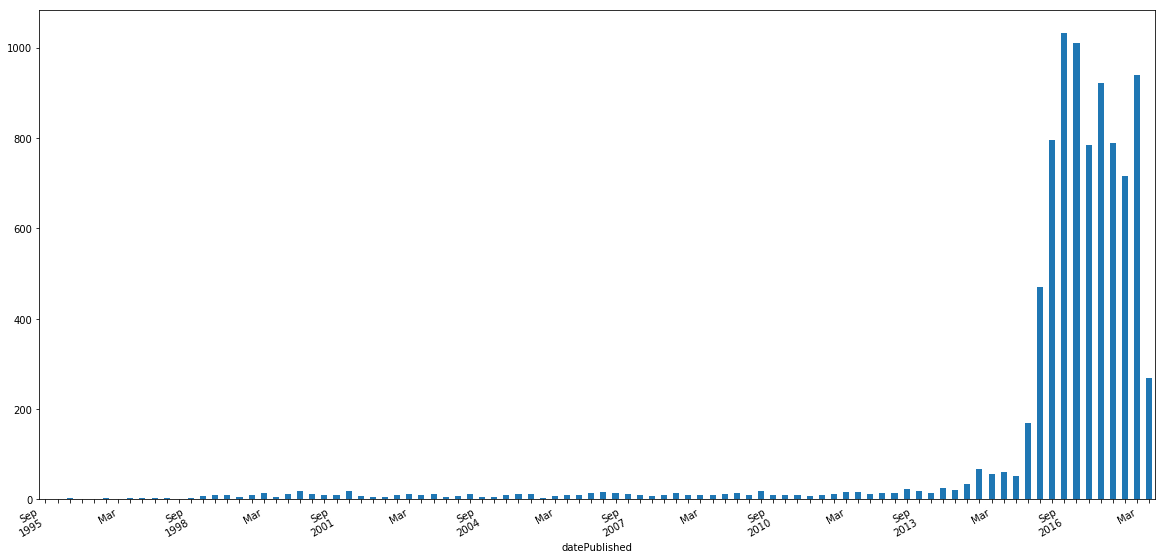


count                    3404
unique                    882
top       2016-09-26 00:00:00
freq                       26
first     1986-05-06 00:00:00
last      2106-11-08 00:00:00
Name: itemReviewed.datePublished, dtype: object


In [9]:
#Date ranges
print(df["datePublished"].describe())
pretty_date_plot(df,"datePublished")

print()
print(df["itemReviewed.datePublished"].describe())
#Clearly some invalid dates (e.g., 2106)
#pretty_date_plot(df,"itemReviewed.datePublished")


In [10]:
#Problems with invalid dates from some publishers
col="itemReviewed.datePublished"
rng=df[col].describe()
cpy=df.copy()
cpy.set_index(col, inplace=True)
df_ts=cpy.resample('1Q').count()["context"]
df_ts



itemReviewed.datePublished
1986-06-30    1
1986-09-30    0
1986-12-31    0
1987-03-31    0
1987-06-30    0
1987-09-30    0
1987-12-31    0
1988-03-31    0
1988-06-30    0
1988-09-30    0
1988-12-31    2
1989-03-31    0
1989-06-30    0
1989-09-30    0
1989-12-31    0
1990-03-31    0
1990-06-30    0
1990-09-30    0
1990-12-31    0
1991-03-31    0
1991-06-30    0
1991-09-30    0
1991-12-31    0
1992-03-31    0
1992-06-30    1
1992-09-30    0
1992-12-31    0
1993-03-31    0
1993-06-30    0
1993-09-30    0
             ..
2099-09-30    0
2099-12-31    0
2100-03-31    0
2100-06-30    0
2100-09-30    0
2100-12-31    0
2101-03-31    0
2101-06-30    0
2101-09-30    0
2101-12-31    0
2102-03-31    0
2102-06-30    0
2102-09-30    0
2102-12-31    0
2103-03-31    0
2103-06-30    0
2103-09-30    0
2103-12-31    0
2104-03-31    0
2104-06-30    0
2104-09-30    0
2104-12-31    0
2105-03-31    0
2105-06-30    0
2105-09-30    0
2105-12-31    0
2106-03-31    0
2106-06-30    0
2106-09-30    0
2106-12-31   